# Intro

Name: Kawshik Shankar Ghosh

ID: M230205001

Batch: MSc 14th

In [ ]:
!pip install scipy

# Problem

1. Load the Breast Cancer dataset from Thyroid_Diff.csv. (source: dataset folder in the google
classroom)
2. Preprocessed the dataset by the following orders:

● Handling Missing Values: Ensure there are no missing values. If there are any, decide on
a strategy to handle them (e.g., imputation).

● Encoding: Convert categorical variables into numerical values.

● Identify outliers if any in the dataset.

● Normalization: Normalize numerical features.

● Splitting: Split the dataset into training and testing sets for model evaluation.

3. Train KNN classifiers with different neighbors until you obtain the best accuracy.
4. Evaluate the model&#39;s performance using classification metrics.
5. Plot the ROC curve.

# Solution

1. Load csv

In [ ]:
# load all library

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
thy=pd.read_csv('/content/thy.csv')
thy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [ ]:
thy.head(10)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
5,52,M,Yes,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Indeterminate,No
6,41,F,No,Yes,No,Clinical Hyperthyroidism,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
7,46,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
8,51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
9,40,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


2. Preprocess

In [ ]:
# check null value

thy.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [ ]:
# Encoding categorical value
from sklearn.preprocessing import LabelEncoder

In [ ]:
label=LabelEncoder()
thy['Gender'] = label.fit_transform(thy['Gender'])
thy['Smoking'] = label.fit_transform(thy['Smoking'])
thy['Hx Smoking'] = label.fit_transform(thy['Hx Smoking'])
thy['Hx Radiothreapy'] = label.fit_transform(thy['Hx Radiothreapy'])
thy['Thyroid Function'] = label.fit_transform(thy['Thyroid Function'])
thy['Physical Examination'] = label.fit_transform(thy['Physical Examination'])
thy['Adenopathy'] = label.fit_transform(thy['Adenopathy'])
thy['Pathology'] = label.fit_transform(thy['Pathology'])
thy['Focality'] = label.fit_transform(thy['Focality'])
thy['Risk'] = label.fit_transform(thy['Risk'])
thy['Stage'] = label.fit_transform(thy['Stage'])
thy['Response'] = label.fit_transform(thy['Response'])
thy['Recurred'] = label.fit_transform(thy['Recurred'])
thy['T'] = label.fit_transform(thy['T'])
thy['N'] = label.fit_transform(thy['N'])
thy['M'] = label.fit_transform(thy['M'])
thy.astype(str).apply(LabelEncoder().fit_transform)
thy[:2]

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0


In [ ]:
thy.describe()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,40.866841,0.185379,0.127937,0.073107,0.018277,1.950392,2.561358,2.924282,2.550914,0.644909,1.566580,2.206266,0.543081,0.046997,0.242820,1.574413,0.281984
std,15.134494,0.389113,0.334457,0.260653,0.134126,0.630917,1.350110,1.172106,0.890257,0.479167,0.643233,1.344667,0.857732,0.211910,0.773274,0.917585,0.450554
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,3.000000,2.500000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,3.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,82.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,5.000000,3.000000,1.000000,2.000000,6.000000,2.000000,1.000000,4.000000,3.000000,1.000000


<Axes: ylabel='Age'>

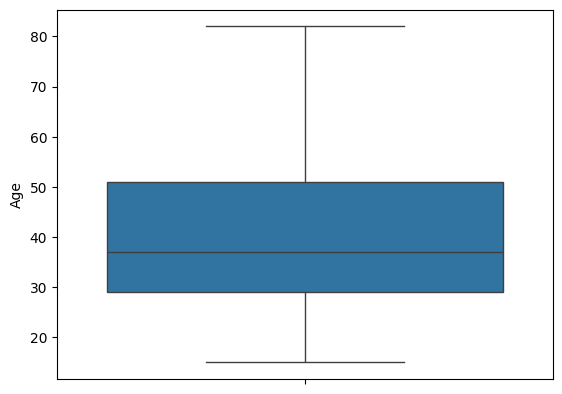

In [ ]:
# Outlier using boxplot

import seaborn as _sb
_sb.boxplot(thy['Age'])

<Axes: ylabel='Thyroid Function'>

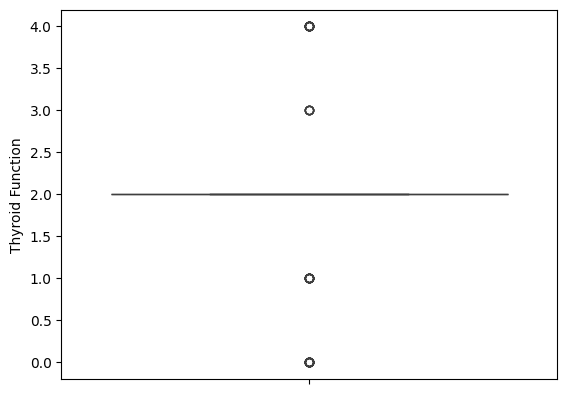

In [ ]:
import seaborn as _sb
_sb.boxplot(thy['Thyroid Function'])

<Axes: ylabel='Physical Examination'>

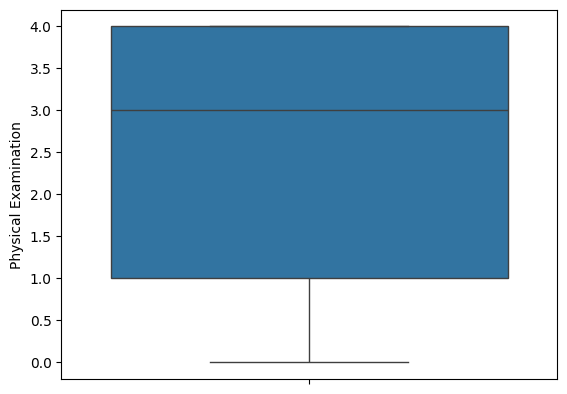

In [ ]:
import seaborn as _sb
_sb.boxplot(thy['Physical Examination'])

<Axes: ylabel='Pathology'>

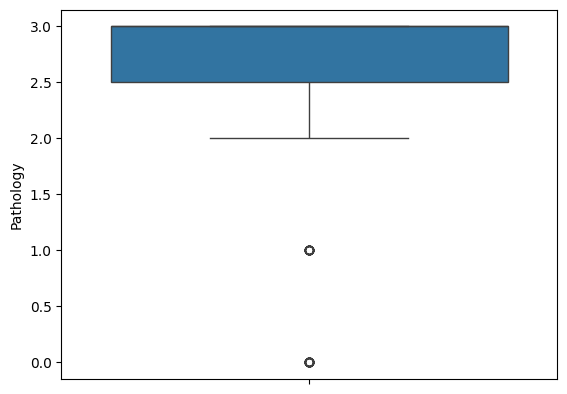

In [ ]:
_sb.boxplot(thy['Pathology'])

<Axes: ylabel='T'>

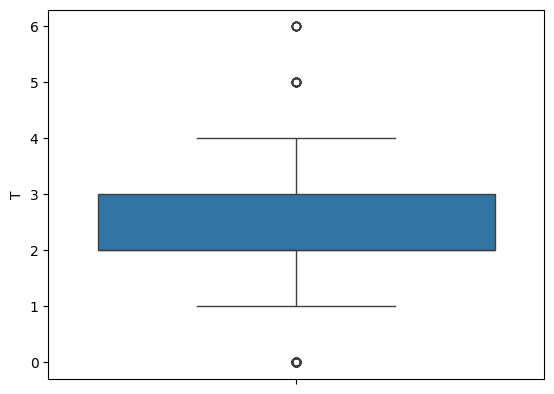

In [ ]:
_sb.boxplot(thy['T'])

<Axes: ylabel='M'>

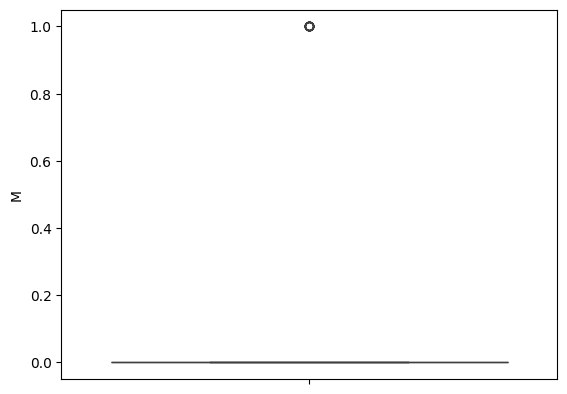

In [ ]:
_sb.boxplot(thy['M'])

<Axes: ylabel='Stage'>

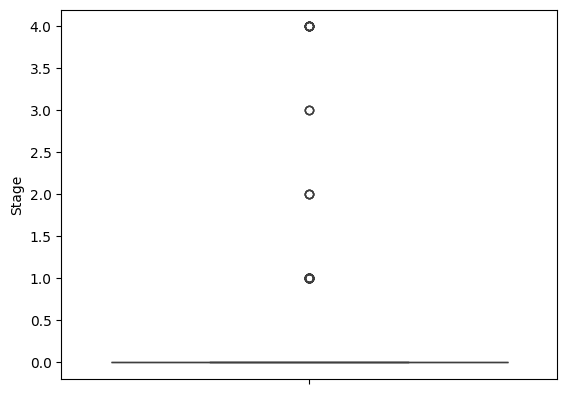

In [ ]:

_sb.boxplot(thy['Stage'])

In [ ]:
# Normalization
from scipy.stats import zscore

scaler = zscore(thy)
_normdata = pd.DataFrame(scaler)

_normdata[:10]

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,-0.917439,-0.477037,-0.383023,-0.280844,-0.136444,0.078732,0.325319,0.064684,-0.619635,0.742029,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,0.464420,-0.62668
1,-0.454315,-0.477037,-0.383023,3.560698,-0.136444,0.078732,-1.157980,0.064684,-0.619635,0.742029,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,-0.626824,-0.62668
2,-0.718957,-0.477037,-0.383023,-0.280844,-0.136444,0.078732,1.066968,0.064684,-0.619635,0.742029,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,-0.626824,-0.62668
3,1.398184,-0.477037,-0.383023,-0.280844,-0.136444,0.078732,1.066968,0.064684,-0.619635,0.742029,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,-0.626824,-0.62668
4,1.398184,-0.477037,-0.383023,-0.280844,-0.136444,0.078732,-1.157980,0.064684,-0.619635,-1.347656,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,-0.626824,-0.62668
5,0.736577,2.096274,2.610810,-0.280844,-0.136444,0.078732,-1.157980,0.064684,-0.619635,-1.347656,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,0.464420,-0.62668
6,0.008810,-0.477037,-0.383023,3.560698,-0.136444,-3.095404,1.066968,0.064684,-0.619635,0.742029,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,-0.626824,-0.62668
7,0.339613,-0.477037,-0.383023,-0.280844,-0.136444,0.078732,1.066968,0.064684,-0.619635,0.742029,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,-0.626824,-0.62668
8,0.670416,-0.477037,-0.383023,-0.280844,-0.136444,0.078732,1.066968,0.064684,-0.619635,0.742029,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,-0.626824,-0.62668
9,-0.057351,-0.477037,-0.383023,-0.280844,-0.136444,0.078732,1.066968,0.064684,-0.619635,0.742029,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,-0.626824,-0.62668


In [ ]:
# Split data
from sklearn.model_selection import train_test_split

X = _normdata.drop('Gender', axis=1)
y = thy['Gender']
#X = _normdata.drop('Risk', axis=1)
#y = thy['Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


3. KNN Classifier & Accuracy

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {100*_accuracy:.2f}%")
evaluation_analysis(y_test, y_pred)

Accuracy: 93.51%
accuracy:  0.935064935064935
f1 score macro:  0.815347721822542
f1 score micro:  0.935064935064935
precision score:  0.935064935064935
recall score:  0.935064935064935


4. Confusion Metrics

In [ ]:
from sklearn import metrics as mtk
def evaluation_analysis(true_label, predicted):
    print('accuracy: ', mtk.accuracy_score(true_label, predicted))
    print('f1 score macro: ', mtk.f1_score(true_label, predicted, average='macro'))
    print('f1 score micro: ', mtk.f1_score(true_label, predicted, average='micro'))
    print('precision score: ', mtk.precision_score(true_label, predicted, average='micro'))
    print('recall score: ', mtk.recall_score(true_label, predicted, average='micro'))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[67  4]
 [ 1  5]]


ROC Curve

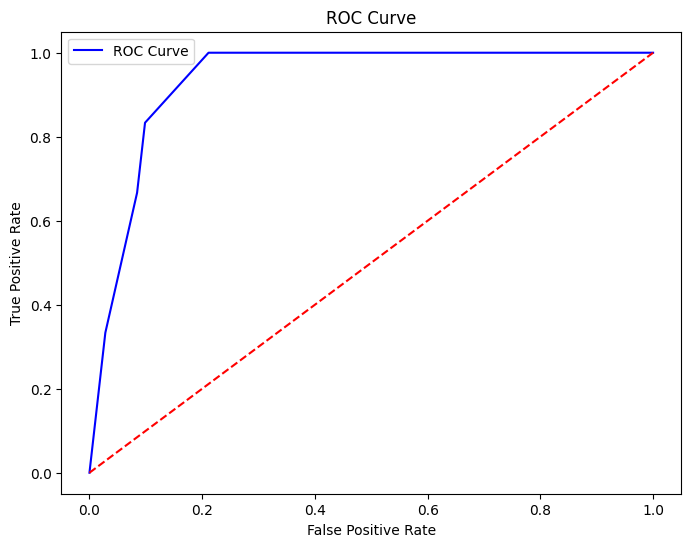

ROC AUC Score: 93.54%


In [ ]:

clf = RandomForestClassifier(n_estimators=5, random_state=42)
clf.fit(X_train, y_train)


y_proba = clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculating ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC AUC Score: {roc_auc*100:.2f}%')

# txt mining


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Sample data
documents = ["I love this movie", "I hate this movie", "This movie is great", "This movie is terrible"]
labels = [1, 0, 1, 0]  # 1: Positive, 0: Negative

# Convert text data to count features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

print(X.toarray()) #print
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

# Initialize and train Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Make predictions
y_pred = mnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

[[0 0 0 1 1 0 1]
 [0 1 0 0 1 0 1]
 [1 0 1 0 1 0 1]
 [0 0 1 0 1 1 1]]
Accuracy: 0.00%


In [ ]:
import pandas as pd
df = pd.read_csv('/content/thy.csv')
df.head(5)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X = _normdata.drop('Recurred', axis=1)
y = thy['Recurred']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}")

Accuracy: 88.31


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

knn = KNeighborsClassifier(n_neighbors=8)

# Using K-Fold Cross Validation
scores = cross_val_score(knn, X, y, cv=2)
print(f"Cross Validation Scores: {scores}")
print(f"Mean CV Score: {np.mean(scores)}")

Cross Validation Scores: [0.8125     0.86387435]
Mean CV Score: 0.8381871727748691


In [ ]:

# loocv to manually evaluate the performance of KNN

from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

X =thy.iloc[:, :-1]
X=thy.values
y=thy['Recurred']
y=y.values

# create loocv procedure
cv = LeaveOneOut()

# enumerate splits
y_true, y_pred = list(), list()

for train_ix, test_ix in cv.split(X):
 # split data
 X_train, X_test = X[train_ix, :], X[test_ix, :]
 y_train, y_test = y[train_ix], y[test_ix]

 # fit model
 knn.fit(X_train, y_train)

 # evaluate model
 yhat = knn.predict(X_test)

 # store
 y_true.append(y_test[0])
 y_pred.append(yhat[0])

# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % acc)

Accuracy: 0.849


In [ ]:
 #loocv to manually evaluate the performance of KNN

from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

X =thy.iloc[:, :-1]
X=X.values
y=thy['Recurred']
y=y.values

cv = LeaveOneOut()

# enumerate splits
y_true, y_pred = list(), list()

for train_ix, test_ix in cv.split(X):
  # split data
  X_train, X_test = X[train_ix, :], X[test_ix, :]
  y_train, y_test = y[train_ix], y[test_ix]

  # fit model
  knn.fit(X_train, y_train)

  # evaluate model
  yhat = knn.predict(X_test)

  # store
  y_true.append(y_test[0])
  y_pred.append(yhat[0])

# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % acc)

Accuracy: 0.828


In [ ]:
from sklearn.model_selection import StratifiedKFold


knn = KNeighborsClassifier(n_neighbors=8)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = []

# Split and train model
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

average_score = np.mean(scores)
print(f"Average Accuracy: {average_score:.2f}")

Average Accuracy: 0.82


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

X =thy.iloc[:, :-1]
#X=X.values
y=thy['Recurred']
#y=y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()
nb=MultinomialNB()

param_grid = {
    'n_neighbors': [3, 4, 5, 6, 7]
} # for KNN

param_nb= {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

#grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search = GridSearchCV(estimator=nb, param_grid=param_nb, cv=50, n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Grid Search Best Parameters:", grid_search.best_params_)
print("Grid Search Best Score:", grid_search.best_score_)

Grid Search Best Parameters: {'alpha': 0.1}
Grid Search Best Score: 0.8847619047619049
